In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

## PARTIE 1 : Utilisation de scikit-learn pour la regression lineaire


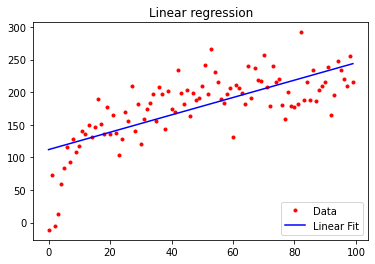

In [2]:
#generation de donnees test
n = 100
x = np.arange(n)
y = np.random.randn(n)*30 + 50. * np.log(1 + np.arange(n))

# instanciation de sklearn.linear_model.LinearRegression
lr = LinearRegression()
lr.fit(x[:, np.newaxis], y)  # np.newaxis est utilise car x doit etre une matrice 2d avec 'LinearRegression'

# representation du resultat
fig = plt.figure()
plt.plot(x, y, 'r.')
plt.plot(x, lr.predict(x[:, np.newaxis]), 'b-')
plt.legend(('Data', 'Linear Fit'), loc='lower right')
plt.title('Linear regression')
plt.show()


### <span style="color:blue">QUESTION 1.1 :</span> 
Expliquer ce qu'est *lr* et ce que font *lr.fit* et *lr.predict*



### <span style="color:blue">REPONSE 1.1 :</span> 
$\textit{lr}$ est un modèle de régression linéaire. 
$\textit{lr.fit}$ est une méthode qui optimise le modèle en prenant en entrée les observations $(x_i, y_i)$.
$\textit{lr.predict}$ est une méthode qui appelle le modèle linéaire sur une observation $x$.

### <span style="color:blue">QUESTION 1.2 :</span> 

On s'interesse à x=105. En supposant que le model lineaire soit toujours valide pour ce x, quelle valeur corresondante de y vous semble la plus vraisemblable ? 

On remarquera que les valeurs données pour la prediction doivent être dans un vecteur colonne, ici une matrice 1x1.


### <span style="color:blue">REPONSE 1.2 :</span> 



In [3]:
print('La valeur de y la plus vraisemblable est la valeur prédite par le modèle: ', lr.predict([[105]]))

La valeur de y la plus vraisemblable est la valeur prédite par le modèle:  [251.8761782]



## PARTIE 2 : maximum de vraisemblance

### <span style="color:blue">QUESTION 2.1 :</span> 

Tirer 10 fois une pièce à pile ou face et modéliser les résultats obtenus comme ceux d'une variable aléatoire X qui vaut X_i=0 si on a pile et X_i=1 si on a face.

Calculez le maximum de vraisemblance du paramètre p d'un loi de Bernoulli qui modéliserait le problème. Pour y arriver, différentes valeures possibles de p seront testées et le p retenu sera celui qui a la plus grande vraisemblance.


- Vérifier empiriquement comment évolue ce maximum de vraisemblance si l'on effectue de plus en plus de tirages
- Que se passe-t-il quand il y a trop de tirages ? Représenter la log-vraisemblance plutot que la vraisemblance dans ce cas.




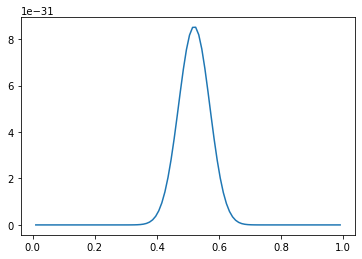

In [4]:
NbTirages=100
NbPiles = np.random.randn(NbTirages) > 0
NbPiles = np.sum(NbPiles)
NbFaces=NbTirages-NbPiles


PossibleValuesForP=np.linspace(0.01,0.99,100)

def vraisemblance(n_pile, n_face, p):
    return p**n_pile * (1-p)**n_face 
    
CorrespondingLikelihood = [vraisemblance(NbPiles, NbFaces, p) for p in PossibleValuesForP] 

plt.plot(PossibleValuesForP,CorrespondingLikelihood)
plt.show()


### <span style="color:blue">QUESTION 2.2 :</span> 


Vérifier empiriquement comment évolue ce maximum de vraisemblance si l'on effectue de plus en plus de tirages. Pour éviter de tirer des centaines de fois à pile ou face, vous pourrez juste modifier *NbTirages¨et *NbPiles* dans le code, puis voir le comportement de la courbe *plt.plot(PossibleValuesForP,CorrespondingLikelihood)*.


### <span style="color:blue">REPONSE 2.2 :</span> 




...

### <span style="color:blue">QUESTION 2.3 :</span> 


Que se passe-t-il quand il y a trop de tirages ? Représenter la log-vraisemblance plutot que la vraisemblance dans ce cas.

### <span style="color:blue">REPONSE 2.3 :</span> 


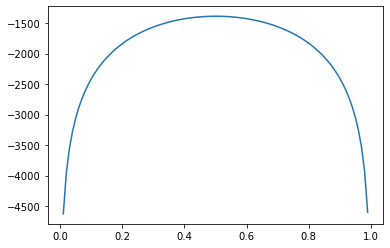

In [5]:
NbTirages=2000
NbPiles = np.random.randn(NbTirages) > 0
NbPiles = np.sum(NbPiles)
NbFaces=NbTirages-NbPiles


PossibleValuesForP=np.linspace(0.01,0.99,100)

def log_vraisemblance(n_pile, n_face, p):
    return n_pile*np.log(p) + n_face*np.log(1-p)
    
CorrespondingLikelihood = [log_vraisemblance(NbPiles, NbFaces, p) for p in PossibleValuesForP] 

plt.plot(PossibleValuesForP,CorrespondingLikelihood)
plt.show()


## PARTIE 3 : maximum de vraisemblance 2

On veut quantifier le lien entre deux variables pour lesquelles une relation lineaire semble exister, mais le bruit qui effecte les observations sur la deuxieme variable n'est clairement pas Gaussien.

Nous allons essayer de trouver la relation entre les variables a l'aide d'un modele de regression lineaire dont les parametres seront optimises en maximisant une vraissemblance plutot qu'en minimisant une erreur au carre.


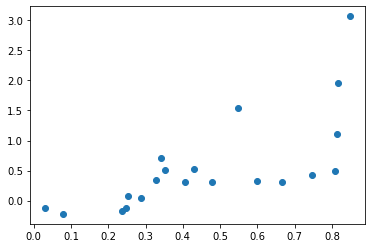

In [6]:
import numpy as np
import matplotlib.pyplot as plt


MyData=np.genfromtxt('QuantifiedDataExo1_3.csv')

plt.scatter(MyData[:,0],MyData[:,1])
plt.show()



### <span style="color:blue">QUESTION 3.1 :</span> 

Essayez de resoudre le probleme a l'aide de l'algorithme de regression lineaire de scikit-learn

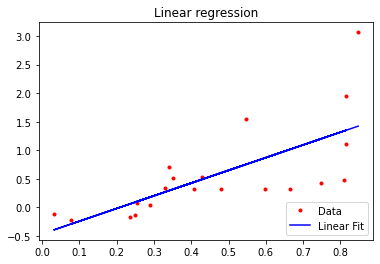

In [7]:
X=MyData[:,0]
Y=MyData[:,1]

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X[:, np.newaxis], Y)

fig = plt.figure()
plt.plot(X, Y, 'r.')
plt.plot(X, lr.predict(X[:, np.newaxis]), 'b-')
plt.legend(('Data', 'Linear Fit'), loc='lower right')
plt.title('Linear regression')
plt.show()


On peut constater que la pente de la courbe est legerement trop forte. Cette mauvaise estimation est due a trois observations a droite de la figure qui font un effet levier. La regression lineaire minimise l'erreur d'approximation au carre sur les observations d'apprentissage. De maniere sous-jacente cela se base sur l'hypothese que les erreurs d'approximation suivent une loi normale centree (et pas forcement reduite). Hors, les erreurs d'approximation autour d'un modele lineaire sont clairement non symetriques ici. Nous allons alors resoudre le probleme au sens du maximum de vraisemblance.

### <span style="color:blue">QUESTION 3.2 :</span> 

On va modeliser le probleme sous la forme :

$ypred_i = a * x_i +b \,,\, \forall i = 1, \ldots, n$
et $err_i= ypred_i-y_i$

ou les $x_i$ et $y_i$ sont les donnees d'apprentissage pour les observations $i$ dans $[1, 2, ..., n]$, et $ypred_i$ approche $y_i$. Les deux parametres du modele lineaire que l'on cherche a estimer sont $a$ et $b$. Afin de résoudre le probleme, on va alors repondre aux sous-questions suivantes :

#### <span style="color:blue">QUESTION 3.2.1 :</span> 
Codez une fonction qui calcul les erreurs d'approximations pour toutes les observations de $X$ et $Y$ avec un $a$ et un $b$ specifiques.

#### <span style="color:blue">QUESTION 3.2.2 :</span> 

Codez une fonction qui calcule la vraisemblance de parametres pour lesquel l'erreur d'approximation suit une loi normale centree d'ecart type sigma. On donnera la valeur par defaut sigma=2

#### <span style="color:blue">QUESTION 3.2.3 :</span> 

Codez une fonction qui calcule la vraisemblance de parametres pour lesquel l'erreur d'approximation suit une loi de chi2. On fixera par defaut le nombre de degres de liberte ddl=3 et l'echelle de la loi (scale) a 0.4. On fera très attention au fait que la densite de probabilite d'une valeur negative sera egale a zero avec la loi du chi2.

#### <span style="color:blue">QUESTION 3.2.4 :</span> 

Utilisez les fonctions de calcul de la vraisemblance pour trouver une relation lineaire qui semble raisonable, i.e. pour trouver les parametres a et b les plus vraisemblables. On pourra eventuellement s'aider d'une representation du nuage de points qui represente le 'score' attribue a chaque observation.


In [8]:
#CODE 2.1
def compute_errors(X,Y,theta):
    """
    returns a vector having the same size as X or Y which represents the errors
    with a 1D linear model of parameters theta=[a,b]
    """
    a=theta[0]
    b=theta[1]

    errors=Y-(a*X+b)
    return errors


In [9]:

#CODE 2.2

from scipy.stats import norm

def likelihood_normal(X,Y,theta,sigma=2.,verbose=False):
    """
    returns the likelihood of the 1D linear model with parameters theta=[a,b] and
    the errors following a normal law of std=sigma
    """

    errors=compute_errors(X,Y,theta)

    scores=[]
    for locError in errors:
        scores.append(norm.pdf(locError, loc=0, scale=sigma))

    likelihood=1.
    for score in scores:
        likelihood*=score

    if verbose:
        plt.scatter(X,Y,c=scores,cmap='rainbow')
        plt.plot(X, theta[0]*X+theta[1], 'b-')
        plt.colorbar()
        plt.title('likelihood='+str(likelihood))
        plt.show()

    return likelihood



In [10]:
#CODE 2.3

from scipy.stats import chi2

def likelihood_chi2(X,Y,theta,dof=3,sc=0.4,verbose=False):
    """
    returns the likelihood of the 1D linear model with parameters theta=[a,b] and
    the errors following a chi2 law of dof degrees of freedom
    """

    errors=compute_errors(X,Y,theta)

    scores=[]
    for locError in errors:
        scores.append(chi2.pdf(locError, dof,scale=sc))

    likelihood=1.
    for score in scores:
        likelihood*=score

    if verbose:
        plt.scatter(X,Y,c=scores,cmap='rainbow')
        plt.plot(X, theta[0]*X+theta[1], 'b-')
        plt.colorbar()
        plt.title('likelihood='+str(likelihood))
        plt.show()

    return likelihood



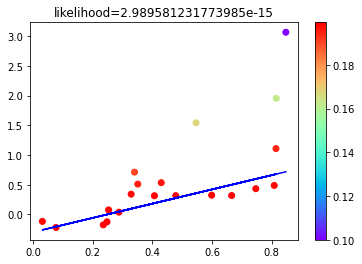

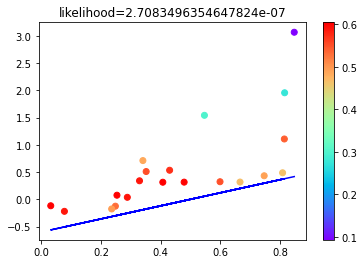

2.7083496354647824e-07

In [11]:
#CODE 2.4

likelihood_normal(X,Y,[1.2,-0.3],sigma=2.,verbose=True)

likelihood_chi2(X,Y,[1.2,-0.6],dof=3,sc=0.4,verbose=True)




### <span style="color:blue">QUESTION 3.3 :</span> 

Codez une fonction de descente de gradient pour apprendre les parametres optimaux du modele (a et b) avec les deux types de bruit consideres mais leurs parametres fixes aux valeurs par defaut.

Remarque: on pourra +maximiser+ la +log-vraisemblance+, ce qui est numeriquement plus simple que la vraisemblance.



[0.02008971 0.02854192]
[0.03923571 0.05518894]
[0.05749523 0.08005779]
[0.07492201 0.10325802]
[0.09156646 0.12489245]
[0.1074759  0.14505758]
[0.12269478 0.16384399]
[0.13726477 0.18133671]
[0.15122503 0.19761552]
[0.16461228 0.21275532]
[0.17746102 0.2268264 ]
[0.18980361 0.23989474]
[0.20167042 0.25202226]
[0.21308998 0.26326707]
[0.22408906 0.27368374]
[0.23469277 0.28332346]
[0.24492471 0.29223428]
[0.254807  0.3004613]
[0.26436044 0.30804686]
[0.27360453 0.31503068]
[0.28255757 0.32145006]
[0.29123675 0.32733999]
[0.29965821 0.33273333]
[0.30783709 0.33766091]
[0.3157876  0.34215165]
[0.32352309 0.34623273]
[0.33105609 0.34992963]
[0.33839835 0.35326628]
[0.34556091 0.35626513]
[0.35255414 0.35894725]
[0.35938776 0.36133242]
[0.36607091 0.36343921]
[0.37261215 0.36528504]
[0.37901954 0.36688626]
[0.38530063 0.36825823]
[0.39146251 0.36941534]
[0.39751184 0.37037111]
[0.40345488 0.37113822]
[0.4092975 0.3717286]
[0.4150452  0.37215341]
[0.42070315 0.37242315]
[0.42627623 0.372547

[ 1.42138974 -0.07144751]
[ 1.42339657 -0.07243092]
[ 1.42539842 -0.07341189]
[ 1.4273953  -0.07439043]
[ 1.42938723 -0.07536653]
[ 1.43137421 -0.07634022]
[ 1.43335626 -0.07731149]
[ 1.43533339 -0.07828035]
[ 1.43730561 -0.0792468 ]
[ 1.43927294 -0.08021085]
[ 1.44123539 -0.08117252]
[ 1.44319297 -0.08213179]
[ 1.44514569 -0.08308869]
[ 1.44709356 -0.08404321]
[ 1.4490366  -0.08499536]
[ 1.45097481 -0.08594515]
[ 1.45290822 -0.08689258]
[ 1.45483682 -0.08783766]
[ 1.45676064 -0.08878039]
[ 1.45867969 -0.08972079]
[ 1.46059397 -0.09065885]
[ 1.4625035  -0.09159458]
[ 1.4644083  -0.09252799]
[ 1.46630836 -0.09345909]
[ 1.46820371 -0.09438787]
[ 1.47009436 -0.09531435]
[ 1.47198031 -0.09623852]
[ 1.47386159 -0.09716041]
[ 1.47573819 -0.09808001]
[ 1.47761014 -0.09899732]
[ 1.47947744 -0.09991236]
[ 1.48134011 -0.10082513]
[ 1.48319815 -0.10173563]
[ 1.48505158 -0.10264387]
[ 1.48690042 -0.10354986]
[ 1.48874466 -0.1044536 ]
[ 1.49058433 -0.1053551 ]
[ 1.49241943 -0.10625436]
[ 1.49424998

[ 1.88519148 -0.29872539]
[ 1.88604724 -0.29914474]
[ 1.88690088 -0.29956305]
[ 1.8877524  -0.29998032]
[ 1.88860181 -0.30039656]
[ 1.88944911 -0.30081176]
[ 1.8902943  -0.30122594]
[ 1.8911374  -0.30163908]
[ 1.89197841 -0.3020512 ]
[ 1.89281733 -0.3024623 ]
[ 1.89365416 -0.30287238]
[ 1.89448892 -0.30328144]
[ 1.89532161 -0.30368948]
[ 1.89615223 -0.30409651]
[ 1.89698079 -0.30450253]
[ 1.8978073  -0.30490755]
[ 1.89863175 -0.30531156]
[ 1.89945416 -0.30571456]
[ 1.90027452 -0.30611657]
[ 1.90109285 -0.30651758]
[ 1.90190915 -0.30691759]
[ 1.90272343 -0.30731661]
[ 1.90353568 -0.30771464]
[ 1.90434591 -0.30811168]
[ 1.90515414 -0.30850774]
[ 1.90596036 -0.30890281]
[ 1.90676458 -0.3092969 ]
[ 1.9075668  -0.30969002]
[ 1.90836703 -0.31008216]
[ 1.90916528 -0.31047332]
[ 1.90996154 -0.31086352]
[ 1.91075583 -0.31125275]
[ 1.91154815 -0.31164101]
[ 1.9123385  -0.31202831]
[ 1.91312689 -0.31241464]
[ 1.91391332 -0.31280002]
[ 1.9146978  -0.31318444]
[ 1.91548033 -0.31356791]
[ 1.91626092

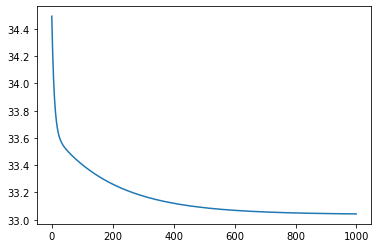

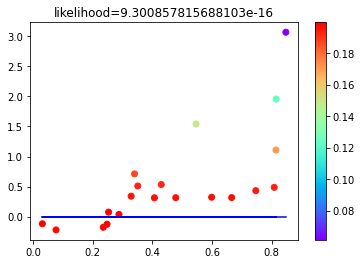

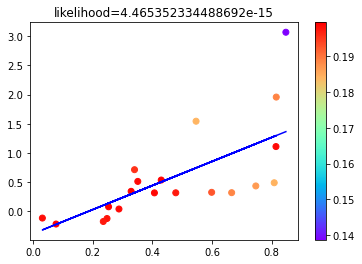

[ 0.08662787 -0.82591505]
[ 0.167594   -0.66816841]
[ 0.24082181 -0.53386816]
[ 0.30337041 -0.43422872]
[ 0.35195916 -0.38413894]
[ 0.38738759 -0.38402067]
[ 0.41950493 -0.39339375]
[ 0.45105864 -0.40073365]
[ 0.4814777  -0.40846732]
[ 0.51091773 -0.41603302]
[ 0.53936724 -0.42353642]
[ 0.56684907 -0.43094759]
[ 0.59337877 -0.43826363]
[ 0.61897303 -0.44547755]
[ 0.64364835 -0.45258369]
[ 0.66742149 -0.45957676]
[ 0.69030957 -0.46645187]
[ 0.71233021 -0.4732045 ]
[ 0.73350163 -0.47983047]
[ 0.75384269 -0.4863259 ]
[ 0.77337297 -0.49268724]
[ 0.79211272 -0.49891124]
[ 0.81008285 -0.50499498]
[ 0.8273049  -0.51093587]
[ 0.84380094 -0.51673168]
[ 0.8595935  -0.52238057]
[ 0.87470545 -0.52788105]
[ 0.8891599  -0.53323206]
[ 0.90298011 -0.53843293]
[ 0.91618931 -0.54348339]
[ 0.92881066 -0.54838357]
[ 0.94086712 -0.55313403]
[ 0.95238134 -0.55773565]
[ 0.96337558 -0.56218973]
[ 0.97387167 -0.56649785]
[ 0.98389089 -0.57066194]
[ 0.99345396 -0.57468419]
[ 1.00258097 -0.57856706]
[ 1.01129139

[ 1.19811922 -0.67254631]
[ 1.19811926 -0.67254633]
[ 1.19811929 -0.67254635]
[ 1.19811933 -0.67254637]
[ 1.19811936 -0.67254639]
[ 1.19811939 -0.67254641]
[ 1.19811942 -0.67254642]
[ 1.19811945 -0.67254644]
[ 1.19811948 -0.67254645]
[ 1.1981195  -0.67254647]
[ 1.19811953 -0.67254648]
[ 1.19811955 -0.67254649]
[ 1.19811958 -0.67254651]
[ 1.1981196  -0.67254652]
[ 1.19811962 -0.67254653]
[ 1.19811964 -0.67254654]
[ 1.19811966 -0.67254655]
[ 1.19811968 -0.67254656]
[ 1.1981197  -0.67254657]
[ 1.19811971 -0.67254658]
[ 1.19811973 -0.67254659]
[ 1.19811975 -0.6725466 ]
[ 1.19811976 -0.6725466 ]
[ 1.19811978 -0.67254661]
[ 1.19811979 -0.67254662]
[ 1.1981198  -0.67254663]
[ 1.19811982 -0.67254663]
[ 1.19811983 -0.67254664]
[ 1.19811984 -0.67254665]
[ 1.19811985 -0.67254665]
[ 1.19811986 -0.67254666]
[ 1.19811987 -0.67254666]
[ 1.19811988 -0.67254667]
[ 1.19811989 -0.67254667]
[ 1.1981199  -0.67254668]
[ 1.19811991 -0.67254668]
[ 1.19811992 -0.67254669]
[ 1.19811993 -0.67254669]
[ 1.19811993

[ 1.19812011 -0.67254679]
[ 1.19812011 -0.67254679]
[ 1.19812011 -0.67254679]
[ 1.19812011 -0.67254679]
[ 1.19812011 -0.67254679]
[ 1.19812011 -0.67254679]
[ 1.19812011 -0.67254679]
[ 1.19812011 -0.67254679]
[ 1.19812011 -0.67254679]
[ 1.19812011 -0.67254679]
[ 1.19812011 -0.67254679]
[ 1.19812011 -0.67254679]
[ 1.19812011 -0.67254679]
[ 1.19812011 -0.67254679]
[ 1.19812011 -0.67254679]
[ 1.19812011 -0.67254679]
[ 1.19812011 -0.67254679]
[ 1.19812011 -0.67254679]
[ 1.19812011 -0.67254679]
[ 1.19812011 -0.67254679]
[ 1.19812011 -0.67254679]
[ 1.19812011 -0.67254679]
[ 1.19812011 -0.67254679]
[ 1.19812011 -0.67254679]
[ 1.19812011 -0.67254679]
[ 1.19812011 -0.67254679]
[ 1.19812011 -0.67254679]
[ 1.19812011 -0.67254679]
[ 1.19812011 -0.67254679]
[ 1.19812011 -0.67254679]
[ 1.19812011 -0.67254679]
[ 1.19812011 -0.67254679]
[ 1.19812011 -0.67254679]
[ 1.19812011 -0.67254679]
[ 1.19812011 -0.67254679]
[ 1.19812011 -0.67254679]
[ 1.19812011 -0.67254679]
[ 1.19812011 -0.67254679]
[ 1.19812011

[ 1.19812011 -0.67254679]
[ 1.19812011 -0.67254679]
[ 1.19812011 -0.67254679]
[ 1.19812011 -0.67254679]
[ 1.19812011 -0.67254679]
[ 1.19812011 -0.67254679]
[ 1.19812011 -0.67254679]
[ 1.19812011 -0.67254679]
[ 1.19812011 -0.67254679]
[ 1.19812011 -0.67254679]
[ 1.19812011 -0.67254679]
[ 1.19812011 -0.67254679]


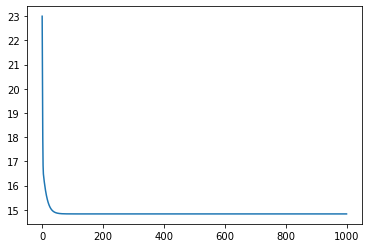

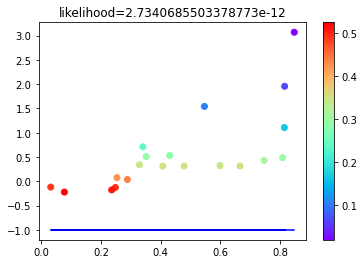

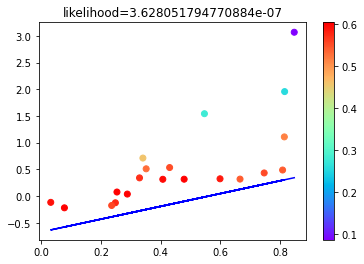

3.628051794770884e-07

In [12]:

def MinusLogLikelihood_normal(X,Y,theta,sigma=2.):
    return -np.log(likelihood_normal(X,Y,theta,sigma=sigma)) #ne resoud pas les pbs numeriques si n est grand, mais plus sympatique pour la descente de gradient

def MinusLogLikelihood_chi2(X,Y,theta,dof=3,sc=0.4):
    return -np.log(likelihood_chi2(X,Y,theta,dof=dof,sc=sc)) #ne resoud pas les pbs numeriques si n est grand, mais plus sympatique pour la descente de gradient

#3.1: fonctions pour la descente de gradient

def Grad_function(f,X,Y,theta_loc,epsilon=1e-5):
  fx=f(X,Y,theta_loc)
  p=np.size(theta_loc)
  ApproxGrad=np.zeros(p)
  veps=np.zeros(p)

  for i in range(p):
    veps[:]=0.
    veps[i]+=epsilon
    ApproxGrad[i]=(f(X,Y,theta_loc+veps)-fx)/epsilon
  return ApproxGrad

#descente de gradient avec alpha defini a la main

def grad_descent(funct,X,Y,theta_init,convspeedfactor=0.1,nbIterations=100):
    evo_f_theta=[]
    theta=theta_init.copy()
    for i in range(nbIterations):
        theta=theta-convspeedfactor*Grad_function(funct,X,Y,theta,0.001)
        evo_f_theta.append(funct(X,Y,theta))
        print(theta)


    plt.plot(evo_f_theta)
    plt.show()

    return theta

#3.2: fonctions pour calculer le maximum de vraisemblance

#utilisation:
theta_init=np.array([0.,0.])
theta_optim=grad_descent(MinusLogLikelihood_normal,X,Y,theta_init,convspeedfactor=0.01,nbIterations=1000)


likelihood_normal(X,Y,theta_init,sigma=2.,verbose=True)
likelihood_normal(X,Y,theta_optim,sigma=2.,verbose=True)

#on constate que le resultat est tres proche de ce que l'on avait avec la regression lineaire
#classique, qui minimise la somme des erreurs au carre



#utilisation:
theta_init=np.array([0.,-1.])
theta_optim=grad_descent(MinusLogLikelihood_chi2,X,Y,theta_init,convspeedfactor=0.01,nbIterations=1000)

likelihood_chi2(X,Y,theta_init,dof=3,sc=0.4,verbose=True)
likelihood_chi2(X,Y,theta_optim,dof=3,sc=0.4,verbose=True)



l'optimisation marche aussi, meme si il faut faire tres attention au choix du theta_init (la densite du chi2 est nulle pour les erreurs negatives)... par contre :
  -> la vraisemblance est de 10e-7 au lieu de 10e-15
  -> le modele lineaire colle mieux a la majorite des donnees et est moins sensible aux donnees visiblement aberrantes


On peut alors plus faire confiance a la pente calculee avec le bruit de type chi2 que le bruit gaussien, MAIS en etant clair sur le fait qu'on aura une tendance loin d'etre negligeable de s'eloigner regulierement du modele lineaire de maniere non-symetrique par rapport au modele.


In [13]:
"""
#Remarque : Generation de donnees dans cet exercice :

import numpy as np
import matplotlib.pyplot as plt
n = 20
X = np.random.uniform(size=n)
y = 1.2*X[:] + np.random.chisquare(1.,size=n)*0.4-0.5

plt.plot(X[], y, 'r.')
plt.show()

MyData=np.concatenate((X.reshape(-1,1),y.reshape(-1,1)),axis=1)
np.savetxt('J18_E4_QuantifiedData.csv',MyData)
"""

"\n#Remarque : Generation de donnees dans cet exercice :\n\nimport numpy as np\nimport matplotlib.pyplot as plt\nn = 20\nX = np.random.uniform(size=n)\ny = 1.2*X[:] + np.random.chisquare(1.,size=n)*0.4-0.5\n\nplt.plot(X[], y, 'r.')\nplt.show()\n\nMyData=np.concatenate((X.reshape(-1,1),y.reshape(-1,1)),axis=1)\nnp.savetxt('J18_E4_QuantifiedData.csv',MyData)\n"


## PARTIE 4 : impact et detection d'outliers



b_0=6.536138308152385 et b_1=5.116795254768829


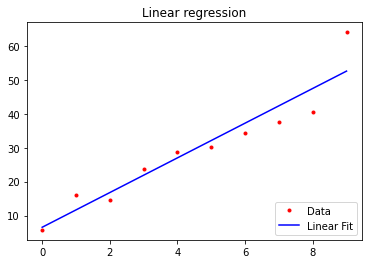

In [14]:
#generation de donnees test
def generate_data(n_samples, outlier=False, b_1=4.):
    x = np.arange(n_samples)
    y = 10. + b_1*x + np.random.randn(n_samples)*3.
    if outlier:
        y[-1] += 20
    return x, y

def s2(y_true, y_pred):
    n = len(y_true)
    SSE = np.sum((y_true - y_pred)**2)
    return SSE / (n-1)


x, y = generate_data(n_samples=10, outlier=True)
# instanciation de sklearn.linear_model.LinearRegression
lr = LinearRegression()
lr.fit(x[:, np.newaxis], y)  # np.newaxis est utilise car x doit etre une matrice 2d avec 'LinearRegression'

# representation du resultat

print('b_0='+str(lr.intercept_)+' et b_1='+str(lr.coef_[0]))

fig = plt.figure()
plt.plot(x, y, 'r.')
plt.plot(x, lr.predict(x[:, np.newaxis]), 'b-')
plt.legend(('Data', 'Linear Fit'), loc='lower right')
plt.title('Linear regression')
plt.show()


### <span style="color:blue">QUESTION 4.1 :</span> 


Remarquons que la ligne 'y[9]=y[9]+20' génere artificiellement une donnée aberrante.

Tester l'impact de la donnée aberrante en estimant b_0, b_1 et s^2 sur 
- 5 jeux de données générés comme dans la cellule précédente et
- 5 autres jeux aussi générés suivant cette méthode, mais sans la données aberrant (simplement ne pas executer la ligne y[9]=y[9]+20).

On remarque que $\beta_0 = 10$, $\beta_1 = 4$ et $\sigma=3$ dans les données simulees.


### <span style="color:blue">REPONSE 4.1 :</span> 



In [15]:
b_0, b_1, s_2 = [], [], []
for i in range(5):
    x, y = generate_data(n_samples=10, outlier=False)
    lr = LinearRegression()
    lr.fit(x[:, np.newaxis], y)
    b_0.append(lr.intercept_)
    b_1.append(lr.coef_[0])
    s_2.append(s2(y,lr.predict(x[:, np.newaxis]))) 

print(f'Sans outlier - b_0 moyen : {np.mean(b_0)}, b_1 moyen : {np.mean(b_1)}, s_2 moyen : {np.mean(s_2)}')

b_0, b_1, s_2 = [], [], []
for i in range(5):
    x, y = generate_data(n_samples=10, outlier=True)
    lr = LinearRegression()
    lr.fit(x[:, np.newaxis], y)
    b_0.append(lr.intercept_)
    b_1.append(lr.coef_[0])
    s_2.append(s2(y,lr.predict(x[:, np.newaxis]))) 

print(f'Avec outlier - b_0 moyen : {np.mean(b_0)}, b_1 moyen : {np.mean(b_1)}, s_2 moyen : {np.mean(s_2)}')

Sans outlier - b_0 moyen : 10.643706973039034, b_1 moyen : 3.8215949673485143, s_2 moyen : 7.92797057614774
Avec outlier - b_0 moyen : 7.697906498319386, b_1 moyen : 4.928893746206031, s_2 moyen : 36.932015208557004


La variance estimée du bruit est beaucoup plus grande avec une donnée aberrante.
La donnée aberrante introiduit un biais dans l'estimation des statistiques b_0 et b_1.


### <span style="color:blue">QUESTIONS 4.2 :</span> 

#### <span style="color:blue">QUESTION 4.2.a :</span> 
Pour chaque variable i, calculez les profils des résidus $e_{(i)j}=y_j - \hat{y_{(i)j}}$ pour tous les j, où  \hat{y_{(i)j}} est l'estimation de y_j à partir d'un modele  linéaire appris sans l'observation i.
#### <span style="color:blue">QUESTION 4.2.b :</span> 
En quoi le profil des e_{(i)j} est différent pour i=9 que pour les autres i
#### <span style="color:blue">QUESTION 4.2.c :</span> 
Etendre ces calculs pour définir la distance de Cook de chaque variable i

AIDE : pour enlever un élement 'i' de 'x' ou 'y', utiliser x_del_i=np.delete(x,i) et y_del_i=np.delete(y,i) 


In [16]:
x, y = generate_data(n_samples=10, outlier=True)

#### <span style="color:blue">REPONSE 4.2.a :</span> 


In [17]:
def profil_residuel(x, y, i):
    lr = LinearRegression()
    xx = np.concatenate((x[:i], x[i+1:]), axis=0)
    yy = np.concatenate((y[:i], y[i+1:]), axis=0)
    lr.fit(xx[:, np.newaxis], yy)
    y_pred = lr.predict(x[:, np.newaxis])
    return (y_pred - y)**2

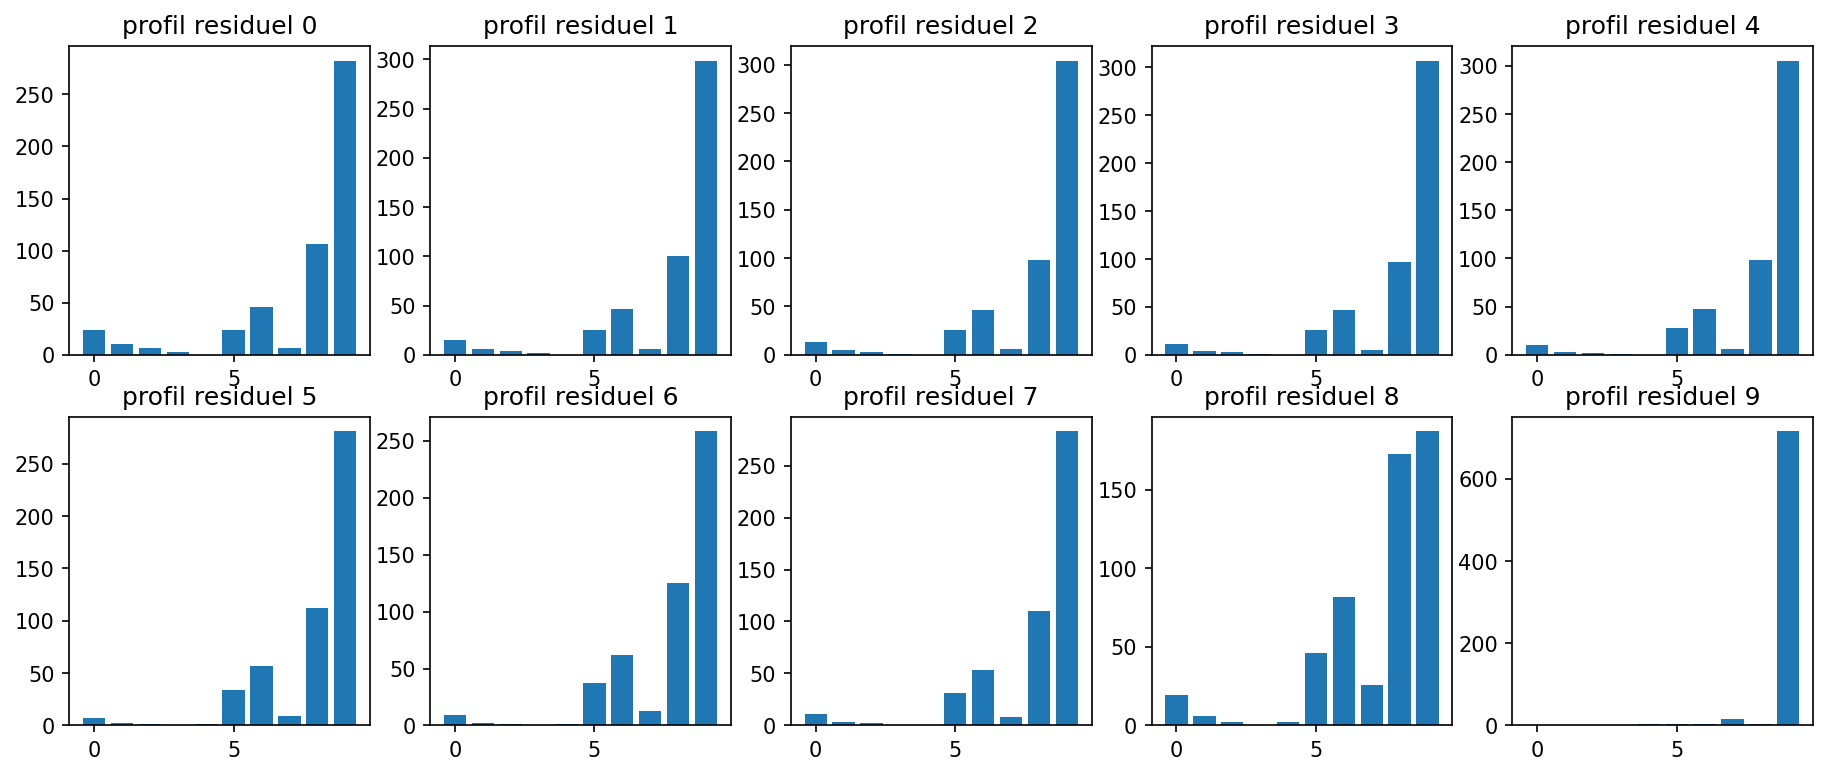

In [18]:
fig, ax = plt.subplots(len(x)//5, 5, figsize=(15,6), dpi=150)
for i in range(len(x)):
    ax[i//5, i%5].bar(x, profil_residuel(x, y, i))
    ax[i//5, i%5].set_title('profil residuel {}'.format(i))
plt.show()

#### <span style="color:blue">REPONSE 4.2.b :</span> 

Le profil résiduel de la donnée aberrante est toujours plus grand que les autres, en particulier lorsqu'on ôte la donnée de la base d'apprentissage.

In [19]:
def cook(x, y, i):
    lr = LinearRegression()
    xx = np.concatenate((x[:i], x[i+1:]), axis=0)
    yy = np.concatenate((y[:i], y[i+1:]), axis=0)
    lr.fit(xx[:, np.newaxis], yy)
    
    lr_tot = LinearRegression()
    lr_tot.fit(x[:, np.newaxis], y)
    y_tot = lr_tot.predict(x[:, np.newaxis])
    
    y_pred = lr.predict(x[:, np.newaxis])
    SSD = np.sum((y_pred - y_tot)**2)
    s_2 = s2(y_tot, y)
    
    return SSD / (2*s_2)

#### <span style="color:blue">REPONSE 4.2.c :</span> 


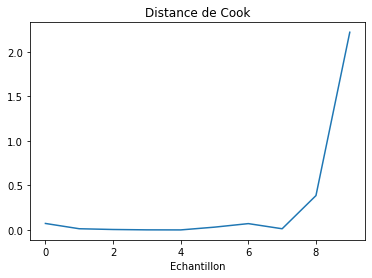

In [20]:
cook_ = [cook(x, y, i) for i in range(len(x))]
plt.plot(cook_)
plt.title('Distance de Cook')
plt.xlabel('Echantillon')
plt.show()

## Question Bonus

Pour un jeu de données de 20 observations obtenues avec un coefficient directeur $\beta_1$ de $0.2$, faire un test d'hypothèse pour vérifier que les données sont corrélées avec une confiance de 95%. 

On rappelle que sous les hypothèses suivantes : 
 * $\mathbb{E}[\epsilon_i] = 0$,
 * $\mathbb{V}[\epsilon_i] = \sigma^2$,
 * $\forall i \neq j, \: Cov(\epsilon_i, \epsilon_j) = 0$,
 
on a : 

* $\mathbb{E}[\hat{\beta_0}] = \beta_0$,
* $\mathbb{E}[\hat{\beta_1}] = \beta_1$,
* $\mathbb{V}[\hat{\beta_0}] = \sigma^2(\frac{1}{n} + \frac{\bar{x_n}^2}{\sum_{i=1}^n (x_i - \bar{x_n})^2})$,
* $\mathbb{V}[\hat{\beta_1}] = \frac{\sigma^2}{\sum_{i=1}^n (x_i - \bar{x_n})^2}$

En faisant l'hypothèse supplémentaire que les erreurs suivent une loi normale, $\epsilon_i \sim \mathcal{N}(0, \sigma^2)$, on a :

* $\hat{\beta_1} \sim \mathcal{N}(\beta_1, \frac{\sigma^2}{\sum_{i=1}^n (x_i - \bar{x_n})^2})$,
* $\frac{(n-2) \cdot s^2}{\sigma^2} \sim \mathcal{X}^2(n-2)$,
* $\hat{\beta_1}$ et $s^2$ indépendants,

où $s^2 = \frac{\sum_{i=1}^n \hat{\epsilon_i}^2}{n-2}$ est un estimateur non biaisé de $\sigma^2$.

On peut en déduire que:

$$ \frac{ \frac{ \hat{\beta_1}-\beta_1}{\sqrt{\frac{\sigma^2}{\sum_{i=1}^n (x_i - \bar{x_n})^2}}}}{\sqrt{\frac{\frac{(n-2)s^2}{\sigma^2}}{n-2}}} = \frac{\hat{\beta_1}-\beta_1}{\frac{s}{\sqrt{\sum_{i=1}^n (x_i - \bar{x_n})^2}}} = T_n \sim T(n-2)$$ 

où $T(n-2)$ désigne la loi de Student à $n-2$ degrés de liberté, d'espérance nulle si $n-2 > 1$.

Tester l'hypothèse H_0 : $\beta_1 = 0$ en prenant un risque de 5%. 

In [21]:
from scipy.stats import t

x, y = generate_data(n_samples=20, outlier=False, b_1=0.2)
lr = LinearRegression()
lr.fit(x[:, np.newaxis], y)
y_pred = lr.predict(x[:, np.newaxis])
b_0 = lr.intercept_
b_1 = lr.coef_[0]
s_2 = s2(y, y_pred)
s = np.sqrt(s_2)
s_x = np.sqrt(np.sum((x-np.mean(x))**2))

def sample_T_n(b_1, beta_1, s, s_x):
    return (b_1 - beta_1)/(s/s_x)

t_ = sample_T_n(b_1, 0, s, s_x)

alpha = 5/100
p_fractile = 1-alpha/2
t_fractile = t.ppf(p_fractile, df=len(y)-2)

print('t = ', t_)
print('P(T_n <= t_{1-alpha/2}) = ', p_fractile)
print('t_{1-alpha/2} = ', t_fractile)
print(f'On rejette H_0 avec un risque {alpha} si |t| >= t_{1-alpha/2}: ', abs(t_) >= t_fractile)

t =  3.1183743537655664
P(T_n <= t_{1-alpha/2}) =  0.975
t_{1-alpha/2} =  2.10092204024096
On rejette H_0 avec un risque 0.05 si |t| >= t_0.975:  True


## PARTIE 5 : Vers la regression linéaire multiple et optimisation

On considère que l'on connait les notes sur une année de n élèves dans p matières, ainsi que leurs notes à un concours en fin d'annee. L'année suivante, on  se demande si on ne pourrait pas prédire la note des étudiants au concours en fonction de leurs notes annuelle afin d'estimer leurs chances de réussite au concours.


On va resoudre le problème à l'aide de la régression linéaire en dimension p>1 sans utiliser scikit-learn. 



### <span style="color:blue">QUESTION 5.1 :</span> 

A l'aide de la fonction 'SimulateObservations', simulez un jeu de donnees d'apprentissage [X_l,y_l] avec 30 observations et un jeu de test [X_t,y_t] avec 10 observations. Les observations seront en dimension p=10



In [22]:
def SimulateObservations(n_train,n_test,p):
    """
    n_train: number of training obserations to simulate
    n_test: number of test obserations to simulate
    p: dimension of the observations to simulate
    """

    ObsX_train=20.*np.random.rand(n_train,p)
    ObsX_tst=20.*np.random.rand(n_test,p)

    RefTheta=np.random.rand(p)**3
    RefTheta=RefTheta/RefTheta.sum()
    print("The thetas with which the values were simulated is: "+str(RefTheta))

    ObsY_train=np.dot(ObsX_train,RefTheta.reshape(p,1))+1.5*np.random.randn(n_train,1)
    ObsY_tst=np.dot(ObsX_tst,RefTheta.reshape(p,1))+1.5*np.random.randn(n_test,1)

    return [ObsX_train,ObsY_train,ObsX_tst,ObsY_tst,RefTheta]


### <span style="color:blue">REPONSE 5.1 :</span> 

In [23]:
p=10
[ObsX_train,ObsY_train,ObsX_test,ObsY_test,RefTheta]=SimulateObservations(30,10,p=10)

The thetas with which the values were simulated is: [0.13135353 0.01193274 0.26162845 0.02532067 0.12292089 0.39499983
 0.00313297 0.04394837 0.00170456 0.003058  ]



### <span style="color:blue">QUESTION 5.2 :</span> 

On considere un modele linéaire en dimension p>1 pour mettre en lien les x[i,:] et les y[i], c'est a dire que np.dot(x[i,:],theta_optimal) doit etre le plus proche possible de y[i] sur l'ensemble des observations i. Dans le modèle linéaire multiple, theta_optimal est un vecteur de taille [p,1] qui pondère les différentes variables observées (ici les moyennes dans une matière). Coder alors une fonction qui calcule la moyenne des différences au carré entre ces valeurs en fonction de theta, *i.e.* la mean squared error (MSE) du modèle.

### <span style="color:blue">REPONSE 5.2 :</span> 

In [24]:
def CptMSE(theta_test, X, y_true):
    y_pred = np.dot(X, theta_test)[:, np.newaxis]
    MSE = np.mean((y_true - y_pred)**2)
    return MSE

theta_test=np.random.rand(p)
theta_test=theta_test/theta_test.sum()

MSE_test=CptMSE(theta_test, ObsX_train, ObsY_train)


### <span style="color:blue">QUESTION 5.3 :</span> 

On va maintenant chercher le theta_test qui minimise cette fonction (il correspondra à theta_optimal), et ainsi résoudre le probleme d'apprentissage de regression lineaire multiple. Utiliser pour cela la fonction minimize de scipy.optimize


De manière importante, la recherche des paramètres *theta_optimal* sera effectuée en utilisant les observations d'apprentissage (*ObsX_train* et *ObsY_train* en sortie *SimulateObservations*). La MSE obtenue sur les observations d'apprentissage avec *theta_optimal* sera comparée à celle obtenue avec les observations de test (*ObsX_tst* et *ObsY_tst* en sortie *SimulateObservations*) avec le même *theta_optimal*. Que constatez vous ?



### <span style="color:blue">REPONSE 5.3 :</span> 

In [25]:
from scipy.optimize import minimize

theta_init=np.abs(np.random.randn(p))/10.
solution = minimize(CptMSE, theta_init, args=(ObsX_train, ObsY_train))
theta_optim = solution.x

In [26]:
mse_train = CptMSE(theta_optim, ObsX_train, ObsY_train)
mse_test = CptMSE(theta_optim, ObsX_test, ObsY_test)

mse_train_ref = CptMSE(RefTheta, ObsX_train, ObsY_train)
mse_test_ref = CptMSE(RefTheta, ObsX_test, ObsY_test)

print("Theta optimal --- ")
print("Base d'apprentissage - MSE : ", mse_train)
print("Base de test - MSE : ", mse_test)
print("")
print("Theta de référence --- ")
print("Base d'apprentissage - MSE : ", mse_train_ref)
print("Base de test - MSE : ", mse_test_ref)

Theta optimal --- 
Base d'apprentissage - MSE :  1.5996624319782113
Base de test - MSE :  3.48888816097958

Theta de référence --- 
Base d'apprentissage - MSE :  2.0626693406950256
Base de test - MSE :  2.284235091702532


On constate qu'on sur-apprend sur la base d'apprentissage et qu'on se généralise moins bien sur la base de test.

On peut aussi optimiser le modèle par une descente de gradient.

In [27]:
def CptMSE(X,y_true,theta_test):
    y_pred=np.dot(X,theta_test)[:, np.newaxis]
    #print(y_pred.shape)
    #print(y_true.shape)
    MSE=np.mean(np.power(y_pred-y_true,2.))

    return MSE


def gradientApprox(fct_to_minimize,theta_loc,X_loc,Y_loc,epsilon=1e-5):

    fx=fct_to_minimize(X_loc,Y_loc,theta_loc)
    #print(fx)
    ApproxGrad=np.zeros(np.size(theta_loc))
    veps=np.zeros(np.size(theta_loc))

    for i in range(np.size(theta_loc)):
        veps[:]=0.
        veps[i]+=epsilon
        ApproxGrad[i]=(fct_to_minimize(X_loc,Y_loc,theta_loc+veps)-fx)/epsilon
    return ApproxGrad


def analyticGradient(_, theta,x,y,epsilon=1e-5):
    shape = theta.shape
    theta = theta.reshape(-1, 1)
    grad_theta = (-2*np.dot((y-np.dot(x, theta)).T,x))/len(y)
    grad_theta = grad_theta.reshape(shape)
    return grad_theta

def GradientDescent(fct_to_minimize,theta_init,X_loc,Y_loc,alpha=0.01,N=100, approx=True):
    """
    Remark: the multiplicatory coefficient of the gradients will be "alpha" divided by the norm of the first gradient 
    """

    #init
    l_thetas=[theta_init]
    theta_curr=theta_init.copy()

    #run the gradient descent
    n=0
    while n<N:
        #approximate the gradient of fct_to_minimize w.r.t. theta_curr
        if approx:
            g=gradientApprox(fct_to_minimize,theta_curr,X_loc,Y_loc)
        else:
            g=analyticGradient(fct_to_minimize,theta_curr,X_loc,Y_loc)

        #set the multiplicatory coefficient of the gradients
        if n==0:
            NormFirstGrads=np.linalg.norm(g)
            coefMult=alpha/NormFirstGrads

        #update theta
        theta_curr=theta_curr-coefMult*g

        #save the current state and increment n
        l_thetas.append(theta_curr)
        n+=1

    return l_thetas

theta_init = np.abs(np.random.randn(p))/10.
thetas = GradientDescent(CptMSE, theta_init, ObsX_train, ObsY_train, approx=True)
theta_optim = thetas[-1]

mse_train = CptMSE(ObsX_train, ObsY_train, theta_optim)
mse_test = CptMSE(ObsX_test, ObsY_test, theta_optim)

mse_train_ref = CptMSE(ObsX_train, ObsY_train, RefTheta)
mse_test_ref = CptMSE(ObsX_test, ObsY_test, RefTheta)

print("Theta optimal --- ")
print("Base d'apprentissage - MSE : ", mse_train)
print("Base de test - MSE : ", mse_test)
print("")
print("Theta de référence --- ")
print("Base d'apprentissage - MSE : ", mse_train_ref)
print("Base de test - MSE : ", mse_test_ref)

Theta optimal --- 
Base d'apprentissage - MSE :  2.2059265925886384
Base de test - MSE :  3.0769102364081515

Theta de référence --- 
Base d'apprentissage - MSE :  2.0626693406950256
Base de test - MSE :  2.284235091702532
